# Predicting Heart Disease

This notebook looks into various data science and machine learning Python libaries to create a model that predicts whether the patient has heart disease or not.

We will take the following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

More specifically, these topics will be covered:

- **Exploratory Data Analysis** - going through the dataset and understanding *what it is*, what can be manipulated, analyzed, etc.
- **Model Training** - create model(s) to predict a target variable based on other variables
- **Model Evaluation** - evaluating a model's prediction using evaluation metrics
- **Model Fine-Tuning** - once a good model has been found, how can it be improved?
- **Feature Importance** - are there some things that are more important for prediction?
- **Cross-validation** - if we do build a good model, can we be sure it will work on unseen data?
- **Final Report** - if we are presenting our w ork, what would we show someone?

## 1. Problem Definition
- We can explore **binary classification**, where the sample can only be one of two things.

> Given the clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
The original data came from Cleveland's UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/yasserh/heart-disease-dataset

## 3. Evaluation
> If we can reach a 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue this project.

## 4. Features

**Data Dictionary**:

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    - 0: Typical angina: chest pain related decrease blood supply to the heart
    - 1: Atypical angina: chest pain not related to heart
    - 2: Non-anginal pain: typically esophageal spasms (non heart related)
    - 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    - anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    - serum = LDL + HDL + .2 * triglycerides
    - above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    - '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    - 0: Nothing to note
    - 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    - 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
    - looks at stress of heart during excercise
    - unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    - 0: Upsloping: better heart rate with excercise (uncommon)
    - 1: Flatsloping: minimal change (typical healthy heart)
    - 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    - colored vessel means the doctor can see the blood passing through
    - the more blood movement the better (no clots)
13. thal - thalium stress result
    - 1,3: normal
    - 6: fixed defect: used to be defect but ok now
    - 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)



In [1]:
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble  import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve

## Load Data

In [2]:
df = pd.read_csv("Data/heart-disease.csv")
df.shape

(303, 14)

## Data Exploratory (Exploratory Data Analysis or EDA)

1. What quesstion(s) are you trying to prove wrong/solve?
2. What kind of data do you have and how do you treat different types?
3. What's missing from the data and how do you deal with it?
4. What are the outliers and do you need to care for them?
5. How can you change, add, or remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Let's see how many positive (1) and negative (0) samples we have in our dataframe
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot: title={'center': 'Heart Disease'}, xlabel='Patients That Have HD Or Not', ylabel='Value Counts'>

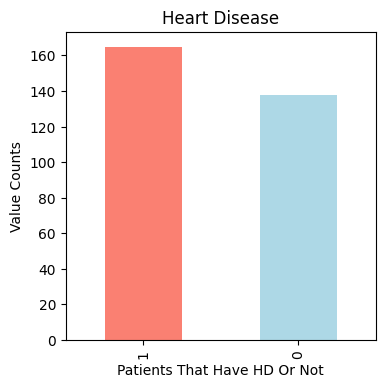

In [6]:
# We seem to have a good balance of combinations for both 1 and 0.
# Let's try to visualize our data so that we can understand it and that other people can as well

df['target'].value_counts().plot(kind='bar',
                                 title='Heart Disease',
                                 figsize=(4,4),
                                 xlabel='Patients That Have HD Or Not',
                                 ylabel='Value Counts',
                                 color=['salmon', 'lightblue'])

In [7]:
# What are the other columns telling us?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
#  Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# We can look at the numeric analysis.
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency According to Gender

Quick Recap from Data Dictionary:
- 0: No Heart Disease
- 1: Heart Disease
- 0: Female
- 1: Male

In [10]:
df.sex.value_counts()

# There is a lot more males than females here.

1    207
0     96
Name: sex, dtype: int64

In [11]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

# 72 women have an indication of heart disease being present.
# 113 men do not have heart disease, though the comparison of the HD
# diagnosis, men have more HD than women from the data.

sex,0,1
target,,
0,24,114
1,72,93


There are about ~100 women and 72 of them have a positive value of heart disease being present, therefore, if the participant is a woman, there is a ~75% chance she has heart disease.

As for males, there are about ~200 total males with around half indicating a presence of heart disease. So, we can predict that if the participant is male, ~50% of the time, he will have heart disease.

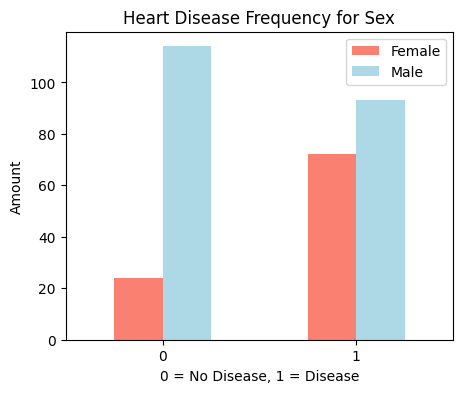

In [12]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                    figsize=(5, 4),
                                    color=['salmon', 'lightblue'])

# Adding some attributes...
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # keeps the labels on the x-axis vertical

### Age vs Max Heart Rate for Heart Disease

We can combine a couple of different independent variables, such as `age` and `thalach`, and we can compare these ind. variables to our target variable, `heart disease`.

Note that there are so many different values for `age` and `thalach`.

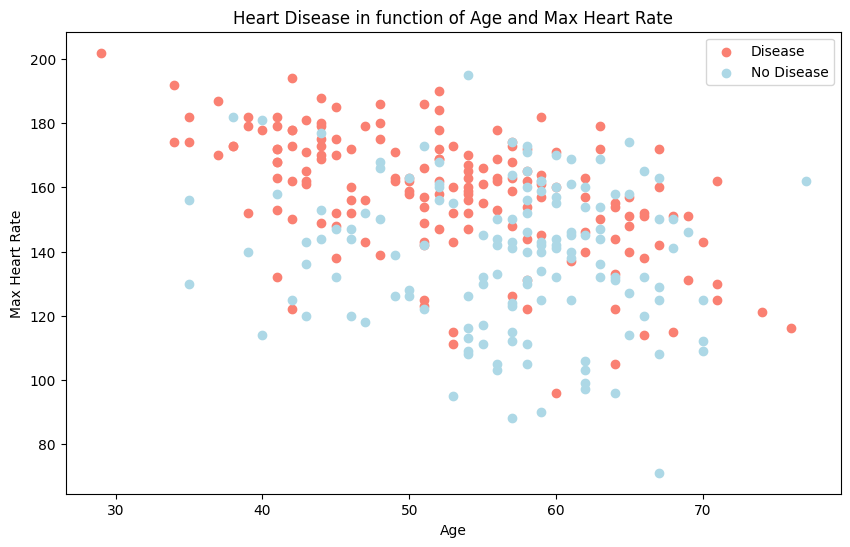

In [13]:
# Creating another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='salmon')

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            color='lightblue')

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

We can infer that those with higher max heart rate, they are at higher risk of disease and those that are older seem to have a lower risk of having heart disease, though it is based on the specific heart rate.

Let's check the age distribution.

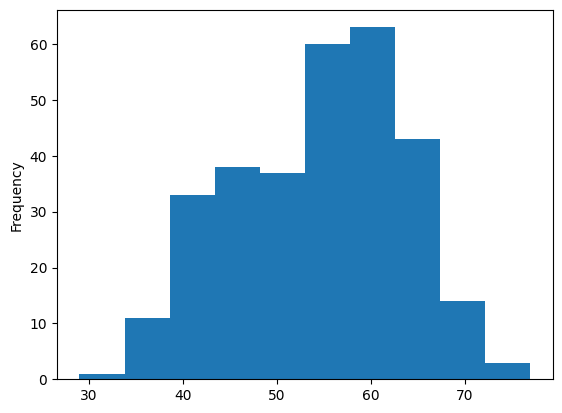

In [14]:
# Histograms help check the distribution of a variable (also known as the spread of the data)
df.age.plot.hist();

Based on the data dictionary, there are four different chest pain types. It'll be interesting to compare that to the target column, so we can take a look at that.

### Heart Disease Frequency

In [15]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


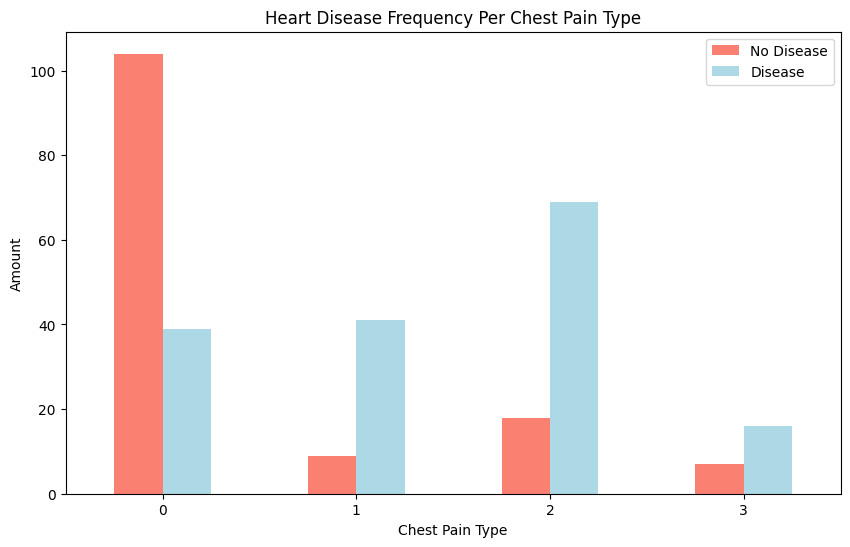

In [16]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                   figsize=(10, 6),
                                   color=['salmon', 'lightblue'])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

What can we infer from this? Let's look back at our data dictionary:

cp - chest pain type
- 0: Typical angina: chest pain related decrease blood supply to the heart
- 1: Atypical angina: chest pain not related to heart
- 2: Non-anginal pain: typically esophageal spasms (non heart related)
- 3: Asymptomatic: chest pain not showing signs of disease

It seems as if that CPT 1 (Atypical Angina) is related to more heart disease despite not it being related to the heart. Interesting. 

Although this is not conclusive, this graph can show the hints of confusion within data.

### Correlation Between Independent Variables

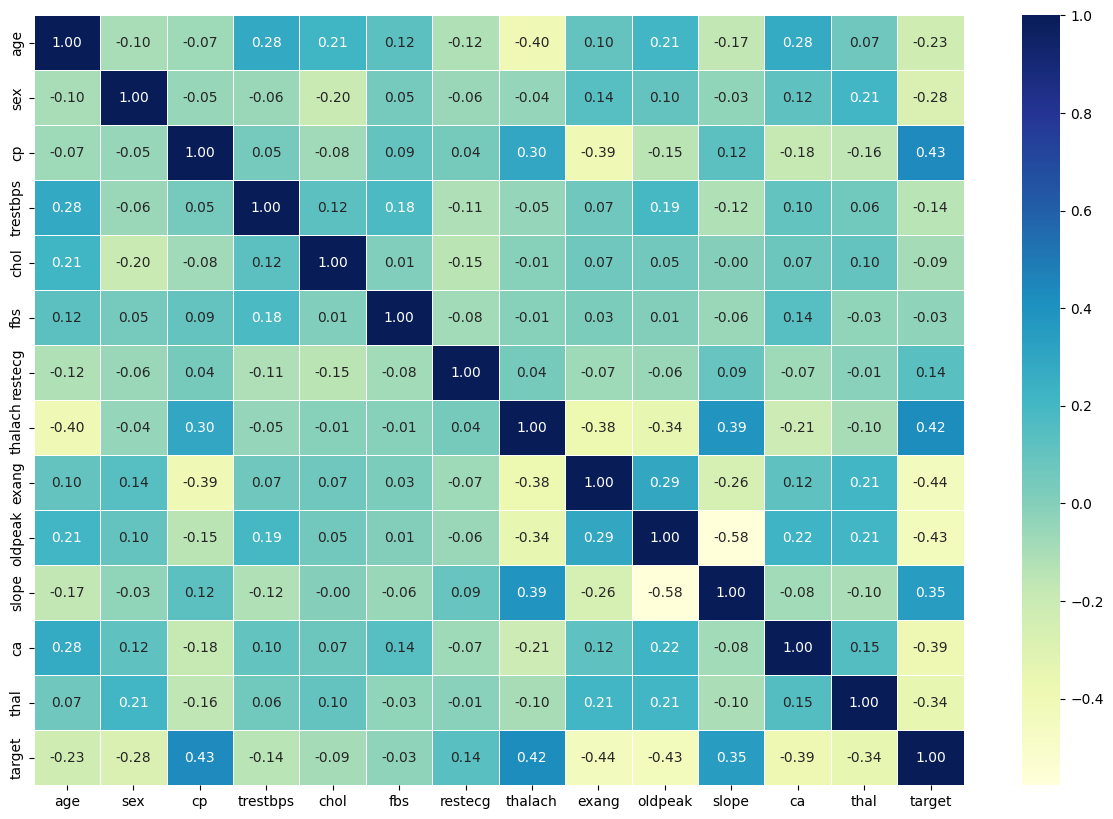

In [17]:
# Make a correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

# A higher positive value means a potential positive correlation (increase) and a higher
# negative value means a potential negative correlation (decrease)

# 5. Modeling

### Preparing Our Data For Machine Learning

Take note of the problem:

> Given the clinical parameters about a patient, can we predict whether or not they have heart disease?

We are aiming for the evaluation metric from before:

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

We can take a look at our data again and see the independent variables within our data.

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
# Split data into X and y

# Everything except the target variable
X = df.drop('target', axis=1)

# Target variable
y = df['target']

### Reviewing train/test split

- Split your data into a **training set** and a **test set**
    - Use your training set to train your model and your test set to test it
    - Test set must remain separate from your training set
- Let your model only be evaluated from the test set, it should never learn there

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables
                                                    y, # dependent variable
                                                    test_size=0.2, # percentage of data to use for train/test split
                                                    random_state=42) # random seed for reproducibility

In [21]:
# Let's take a look at our training data.
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [22]:
y_train, len(y_train)

# We have 242 samples to train on.

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

In [23]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [24]:
y_test, len(y_test)

# And we have 61 examples we can test our models on.

(179    0
 228    0
 111    1
 246    0
 60     1
       ..
 249    0
 104    1
 300    0
 193    0
 184    0
 Name: target, Length: 61, dtype: int64,
 61)

### Model Choices

1. Logistic Regression - `LogisticRegression()`
2. K-Nearest Neighbors - `KNeighboursClassifier()`
3. RandomForest - `RandomForestClassifier()`

Note: Scikit-Learn documentation states in the User Guide that Logistic Regression can also be used as a model for classification. 

In [25]:
# Put the models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    
    models: a dict of different Scikit-Learn ML Models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: testing labels
    """
    # Set random seed
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [26]:
model_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores

c:\Users\Ellie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

<AxesSubplot: >

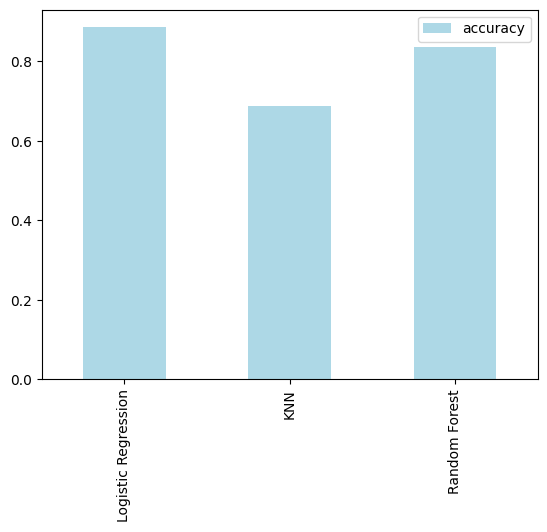

In [27]:
# This shows the accuracy of our models in a more visual approach
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar(color='lightblue')

To test different hyperparameters, we can use a **validation set**, though we do not have much data here, therefore we'll use **cross-validation**. We can go over a few more metrics such as **precision**, **recall**, **F1 Score**, and **ROC Curve** at the same time.

We will lay out the best way to evaluate, tune, and understand our model accuracy and outputs by:

1. Tune model hyperparameters, see whcih one performs best
2. Perform cross-validation
3. Plot ROC curves
4. Create a confusion matrix
5. Get precision, recall, and F1-score metrics
6. Find the most important model features

### Tuning KNN By Hand

We can adjust our KNN model by changing the number of neighbors.

- The number of neighbors is default by 5 (n_neighbors=5)

Though, we can try a few different values.

In [28]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [29]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [30]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

These numbers may be hard to understand, so the best thing we can do is plot them.

Maximum KNN score on the test data: 75.41%


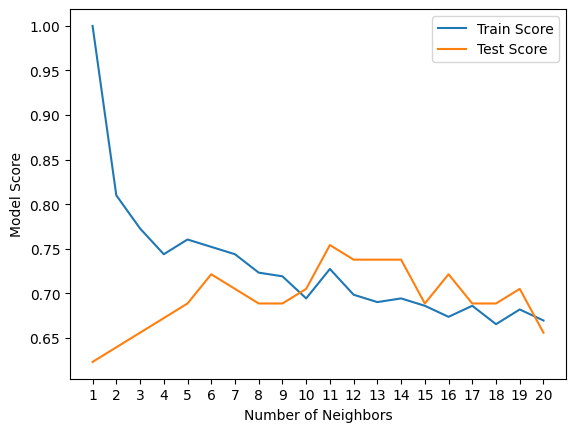

In [31]:
plt.plot(neighbors, train_scores, label='Train Score')
plt.plot(neighbors, test_scores, label='Test Score')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of Neighbors')
plt.ylabel('Model Score')
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_scores) * 100:.2f}%')

Looking at the graph, it seems that `n_neighbors = 11` yields the best score on our test set.

However, despite this, the `KNN` model's performance is not as best compared to Logistic Regression and Random Forest based off of the output from above:

- Logistic Regression: 0.8852459016393442
- KNN: 0.6885245901639344
- Random Forest: 0.8360655737704918

We've tuned `KNN` by hand but let's see how the other two algorithms turn out by using `RandomizedSearchCV`, which allows us to try a number of different combinations, evaluates those combos, and then saves the best one.

### Hyperparameter Tuning Models With `RandomizedSearchCV`

We're going to tune with `RandomizedSearchCV`:
- `LogisticRegression()`
- `RandomForestClassifier()`

The random numbers for our `arange` and `logspace` can be determined from reading through Scikit-Learn documentation.

In [32]:
# Create a hyperparameter grid for LogisticRegression()
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear']}

# Create a hyperparameter grid for RandomForestClassifier()
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

Now that we've got hyperparameter grids setup for each of our models, we can tune them using `RandomizedSearchCV`.

We can pass it the different hyperparameters from `log_reg_grid` as well as set `n_iter = 20`, which means that `RandomizedSearchCV` will try 20 different combinations of hyperparameters from `log_reg_grid` and then save the best ones.

In [85]:
# Tune LogisticRegression()

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
# Note the higher the cv, the longer it will take to run
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression()
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [34]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [35]:
rs_log_reg.score(X_test, y_test)

# Note this is the same score as before for LogisticRegression()

0.8852459016393442

Now that we've tuned Logistic Regression, let's do the same for Random Forest...

In [86]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier()
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [37]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [38]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8688524590163934

In [39]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

Would you look at that? Our previous Random Forest score was 0.8360655737704918, so now it was gone up a few percentage points. Although, as we look at our `model_scores` from before, Logistic Regression is still better.

Since `LogisticRegression` is coming out to the top, we can try tuning it further with `GridSearchCV`.

### Tuning A Model With `GridSearchCV`

The difference between `RandomizedSearchCV` and `GridSearchCV`:
- `RandomizedSearchCV` searches over a grid of hyperparameters performing `n_iter` combinations
- `GridSearchCV` will test every single possible combination

In [87]:
# Different hyperparameters for our LogisticRegression() model
log_reg_grid = {'C': np.logspace(-4, 4, 30),
                'solver': ['liblinear']}

# Setup grid hyperparameter search for LogisticRegression()
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [41]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [42]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [43]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

It seems like the Logistic Regression model is doing the best here regardless of how much hyperparameter tuning we are doing.

## Evaluating A Classification Model

We can look at some of the metrics here:

- ROC Curve, AUC Score - `plot_roc_curve()`
- Confusion Matrix - `confusion_matrix()`
- Classification Report - `classification_report()`
- Precision - `precision_score()`
- Recall - `recall_score()`
- F1 Score - `f1_score()`

In [44]:
# Make predictions on test data
y_preds = gs_log_reg.predict(X_test)

In [45]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [46]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

### Import ROC Curve Function From The sklearn.metrics

We need to understand how our model performs by comparing the true positive rate to the fale positive rate.

> We will consider a diagnostic test that seeks to determine whether a person has a certain disease. A false positive in this case occurs when the person tests positive, but they do not actually have heart disease. A false negative, on the other hand, occurs when the person tests negative and they state they are healthy, but they actually have the disease.

Using Scikit-Learn's function `plot_roc_curve` can help create a ROC curve as well as calculating the are under the curve (AUC) metric.

Note: `estimator` is a fitted machine learning model, `X` and `y` are the data you'd like to test it on.

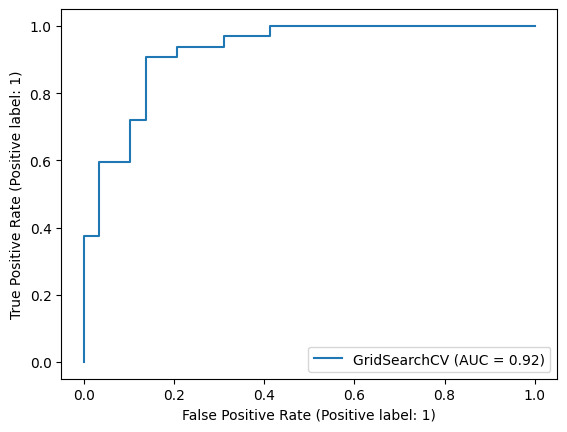

In [47]:
# Import ROC curve function from metrics module
from sklearn.metrics import RocCurveDisplay

# Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);

In [48]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


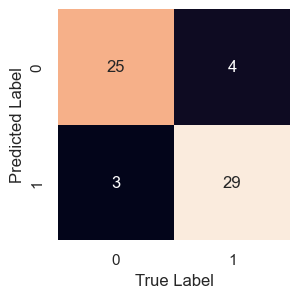

In [49]:
sns.set(font_scale=1)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    
plot_conf_mat(y_test, y_preds)

We can see here that there are 4 occasions where the model predicted 0 when it should've been 1 (false negative) and 3 occasions where the model predicted 1 when it should've been 0.

### Classification Report

We will use `classification_report` and pass it the True labels as well as our model predicted labels.

In [50]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



By looking at our classification matrix, if precision and recall were perfect models, they would be 1.0, therefore f1-score would also be 1.0 as well.

### Calculate Evaluation Metrics Using Cross-Validation

We're going to calculate accuracy, precision, recall, and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`.

In [51]:
# Checking for the best params again
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [52]:
# Create a new classifier with the best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear')

In [53]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [55]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [56]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5,
                                       scoring='precision'))
cv_precision

0.8215873015873015

In [57]:
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5,
                                    scoring='recall'))
cv_recall

0.9272727272727274

In [58]:
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5,
                                scoring='f1'))
cv_f1

0.8705403543192143

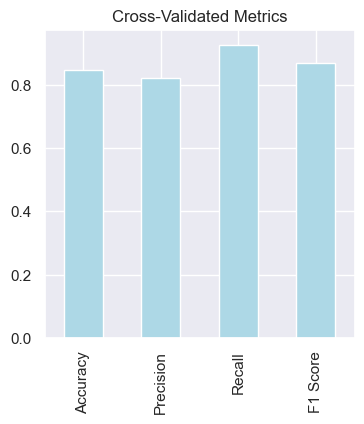

In [67]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                           'Precision': cv_precision,
                           'Recall': cv_recall,
                           'F1 Score': cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title='Cross-Validated Metrics',
                      figsize=(4,4),
                      color='lightblue',
                      legend=False);

### Feature Importance

This is another way of asking, "which features contributed most to the outcomes of the model?"

> Which characteristics contributed most to a model predicting whether someone has heart disease or not?

Since we are using Logistic Regression, the `coef_` attribute is the coefficient of the features in the decision function.

In [70]:
# Fit an instance of LogisticRegression (taken from above)
clf.fit(X_train, y_train);

In [71]:
# Check coef_
clf.coef_

array([[ 0.00320769, -0.86062047,  0.66001431, -0.01155971, -0.00166496,
         0.04017239,  0.31603402,  0.02458922, -0.6047017 , -0.56795457,
         0.45085391, -0.63733326, -0.6755509 ]])

These values contribute to how a model makes a decision on whether patterns in a sample of patients health data leans more towards one having heart disease or not.

In [72]:
# Combining the array with the features (columns)
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.0032076873709286024,
 'sex': -0.8606204735539111,
 'cp': 0.6600143086174385,
 'trestbps': -0.01155970641957489,
 'chol': -0.0016649609500147373,
 'fbs': 0.04017238940156104,
 'restecg': 0.3160340177157746,
 'thalach': 0.02458922261936637,
 'exang': -0.6047017032281077,
 'oldpeak': -0.567954572983317,
 'slope': 0.4508539117301764,
 'ca': -0.6373332602422034,
 'thal': -0.6755508982355707}

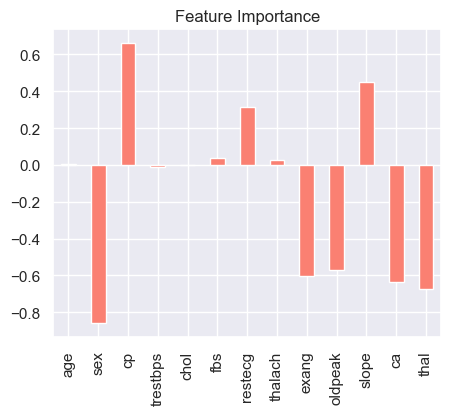

In [79]:
# Visualize feature importance
feature_df = pd.DataFrame(features_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance',
                      color='salmon',
                      figsize=(5,4),
                      legend=False);

Let's break it down.

The larger the value, the more the feature contributes to the model decision.

As we can see, for one of the features, `sex` is fairly negatively correlated.

When the value is negative (`sex`), then there is a negative correlation. This is vice versa for positive values.

Though, when the value of `sex` increases, the target value decreases due to the negative coefficient.

In [80]:
# Compare the 'sex' column to the 'target' column
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


When the `sex` is 0 (female), there are almost three times (72 vs 24) as many people with heart disease (`target` = 1) than without.

And then as `sex` increases to 1 (male), the ratio goes down to almost 1 to 1 (114 vs 93) of people who have heart disease and who don't.

Therefore, it seems like that if the patient is female, then they are most likely to have heart disease compared to a male patient.

Let's look at a positive correlation.

In [83]:
# Positive Correlation
# Contrast slope (positive coefficient) with 'target'
pd.crosstab(df['slope'], df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


Going back to the data dictionary, `slope` was the "slope of the peak exercise ST segment" where:

- 0: Upsloping: better heart rate with excercise (uncommon)
- 1: Flatsloping: minimal change (typical healthy heart)
- 2: Downslopins: signs of unhealthy heart

As the `slope` increases, there is a greater chance that it will be predicting a higher value of the target.

# 6. Experimentation / Conclusion

Taking a look at the model scores:


In [84]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

And then looking back at our evaluation metric:

> If we can reach a 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue this project.

We are not able to meet the evaluation metric. The highest accuracy our model got was below 90%.